In [1]:
import pandas as pd

In [2]:
data = pd.read_csv( 'winequality_white.csv' )
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#No NUll Value.

for i in data.columns :
    print( data[i].dtype )

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64


In [5]:
#All the Columns are non-String. Now we have to seperate data into x and Y( Split Data by Column ).

print( f"len( data.columns ) = { len( data.columns ) }" )

x = data.iloc[ : , : 11 ]
y = data.iloc[ : , 11 ]

len( data.columns ) = 12


In [6]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [7]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [8]:
#Now, we have to split data by Row.

from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size  = 0.3 )

In [10]:
x_train.head()
print()
print( f"len( x_train ) = { len( x_train ) }" )


len( x_train ) = 3428


In [11]:
x_test.head()
print()
print( f"len( x_test ) = { len( x_test ) }" )


len( x_test ) = 1470


In [12]:
y_train.head()
print()
print( f"len( y_train ) = { len( y_train ) }" )


len( y_train ) = 3428


In [13]:
y_test.head()
print()
print( f"len( y_test ) = { len( y_test ) }" )


len( y_test ) = 1470


In [14]:
#Now, To decrease the variance between the row data. we have to do Standard Scaler in order to increase Prediction Accuracy.

from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()

In [16]:
x_train = ss.fit_transform( x_train )

In [17]:
x_test = ss.fit_transform( x_test )

#After Standard Scaler the data type of x_test and x_train will become numpy.ndarray

In [18]:
x_train

array([[ 0.63355453, -1.16508565, -0.19838095, ...,  0.68393015,
        -1.32402214, -0.66894463],
       [ 0.04678098, -0.67264824, -0.03277766, ...,  0.41749313,
        -0.70807372,  1.6796072 ],
       [ 0.16413569, -0.37718579, -0.11557931, ..., -0.11538091,
        -0.62008109,  0.54582356],
       ...,
       [ 0.16413569, -0.57416076, -0.11557931, ..., -1.38095676,
        -0.44409583, -0.02106827],
       [-1.24412082,  0.31222658, -0.11557931, ...,  0.41749313,
         0.25984522,  2.57043721],
       [-1.0094114 ,  0.80466399,  0.4640322 , ...,  1.28341345,
        -0.88405898,  0.6268081 ]])

In [19]:
x_test

array([[-0.17273466, -1.39490461,  1.0305121 , ...,  1.17386423,
         0.01393785,  0.3386447 ],
       [-0.90099456,  1.63510688, -0.45028242, ...,  0.45462719,
        -0.1596947 ,  0.63920373],
       [-0.29411131,  0.42310229, -0.53254878, ...,  0.32385682,
        -0.1596947 , -0.39909108],
       ...,
       [ 2.01204504, -0.48590116,  0.53691393, ..., -1.11461724,
        -0.59377608,  0.01076213],
       [ 0.19139529,  0.62510305, -1.93107693, ..., -1.18000243,
        -0.85422491, -1.05485622],
       [-1.62925446,  0.12010114, -0.28574969, ...,  0.97770867,
        -0.94104118,  1.89608691]])

In [20]:
#Now, we are ready to Go.

from sklearn.decomposition import PCA

In [21]:
pca = PCA( n_components = None )               #PCA Object Creation. Here, n_components are the columns which will get removed
                                               #while performing PCA.

In [22]:
x_train = pca.fit_transform( x_train )
x_test = pca.fit_transform( x_test )

In [23]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio
#We can See the Variane Ratio is in descending Order. Variance Ratio shows how each columns are dependent on each other.

#So, If Variance Ratio is High then, It Mean, Column is less dependant which indicates that, Columns presence in the dataset.
#effects the accuracy in very less ratio.

array([0.29063202, 0.14247213, 0.11503282, 0.09427492, 0.08821313,
       0.0841346 , 0.06509731, 0.052814  , 0.03727399, 0.02878472,
       0.00127037])

In [24]:
pd.DataFrame( variance_ratio )

,0
0,0.290632
1,0.142472
2,0.115033
3,0.094275
4,0.088213
5,0.084135
6,0.065097
7,0.052814
8,0.037274
9,0.028785


In [25]:
#In Above explained_variance_ratio_. If we consider first 2 then, Total

In [30]:
sum = 0

count = 1

for i in variance_ratio:
    sum = sum + i
    print( f"First { count } then, variance_ratio = { sum }" )
    count += 1

First 1 then, variance_ratio = 0.2906320197693887
First 2 then, variance_ratio = 0.4331041505061759
First 3 then, variance_ratio = 0.5481369697488807
First 4 then, variance_ratio = 0.6424118862347029
First 5 then, variance_ratio = 0.7306250146391329
First 6 then, variance_ratio = 0.8147596104142474
First 7 then, variance_ratio = 0.8798569192956299
First 8 then, variance_ratio = 0.9326709158864874
First 9 then, variance_ratio = 0.9699449030734408
First 10 then, variance_ratio = 0.9987296254780105
First 11 then, variance_ratio = 1.0


In [31]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size  = 0.3 )

In [32]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3847,6.4,0.32,0.23,16.20,0.055,36.0,176.0,0.9986,3.26,0.54,9.1
83,7.3,0.22,0.30,8.20,0.047,42.0,207.0,0.9966,3.33,0.46,9.5
749,7.3,0.30,0.42,7.35,0.025,51.0,175.0,0.9928,3.04,0.32,11.4
2223,6.9,0.23,0.33,12.80,0.056,44.0,169.0,0.9980,3.42,0.42,9.8
1636,7.8,0.49,0.49,7.00,0.043,29.0,149.0,0.9952,3.21,0.33,10.0


In [33]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3989,6.8,0.110,0.27,8.60,0.044,45.0,104.0,0.99454,3.20,0.37,9.9
4825,6.0,0.340,0.29,6.10,0.046,29.0,134.0,0.99462,3.48,0.57,10.7
176,7.2,0.320,0.47,5.10,0.044,19.0,65.0,0.99100,3.03,0.41,12.6
372,6.6,0.905,0.19,0.80,0.048,17.0,204.0,0.99340,3.34,0.56,10.0
2774,7.0,0.360,0.32,10.05,0.045,37.0,131.0,0.99352,3.09,0.33,11.7


In [34]:
pca = PCA( n_components = 3 )

In [35]:
x_train = pca.fit_transform( x_train )
x_test = pca.fit_transform( x_test )

In [36]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.91206578, 0.07626732, 0.01082943])

In [37]:
x_train

array([[ 37.30057829,  -9.05106654,   8.35970241],
       [ 68.37122945, -11.6209996 ,  -1.07726551],
       [ 39.86573578,   5.54212659,  -0.98654746],
       ...,
       [-29.38498824,  -4.54643587,  -2.09219485],
       [ 26.22378519,  -7.17057731,   4.18099795],
       [ 48.74329165,  -7.28762977,  -2.25428301]])

In [38]:
x_test

array([[-31.48255855,  17.92608979,   3.36472034],
       [ -6.75109189,  -5.2603055 ,  -0.14047654],
       [-75.99224895,   2.78818612,   2.09051507],
       ...,
       [-14.92786497, -12.41374053,  -0.89840578],
       [104.70269054, -11.86357455,   6.24163674],
       [-69.47034475,  -3.21370288,  -2.17507095]])

In [39]:
import matplotlib.pyplot as plt

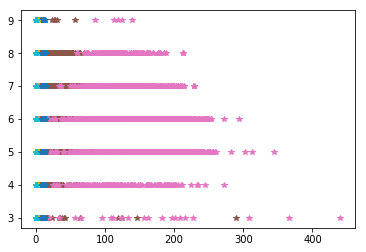

In [40]:
plt.plot( x, y, marker = '*', linestyle = '' )
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit( x_train, y_train )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = lr.predict( x_test )

In [45]:
y_pred

array([6, 6, 6, ..., 6, 5, 6], dtype=int64)

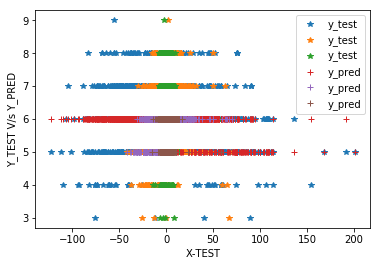

In [46]:
plt.plot( x_test, y_test, marker = '*', linestyle = '', label = 'y_test' )
plt.plot( x_test, y_pred, marker = '+', linestyle = '', label = 'y_pred' )
plt.xlabel( 'X-TEST' )
plt.ylabel( 'Y_TEST V/s Y_PRED' )
plt.legend()
plt.show()

In [47]:
y_test.unique()

array([6, 4, 5, 8, 7, 3, 9], dtype=int64)

In [52]:
lr.score( x_test, y_test )

0.45034013605442175

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
cm = confusion_matrix( y_test, y_pred )

In [55]:
cm

array([[  0,   0,   0,   4,   0,   0,   0],
       [  0,   0,  11,  31,   0,   0,   0],
       [  0,   0,  70, 379,   0,   0,   0],
       [  0,   0,  51, 592,   0,   0,   0],
       [  0,   0,  16, 252,   0,   0,   0],
       [  0,   0,   4,  59,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)